<a href="https://colab.research.google.com/github/AdamTMU/CIND820/blob/main/Adam_M__Capstone_Project_CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Libraries

In [16]:
#Install necessary packages
!pip install ucimlrepo
!pip install sckit-learn
!pip install graphviz
!pip install missingno
!pip install seaborn
# Import the necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


# Retrieving Dataset

In [3]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Descriptive Statistics

In [4]:
# variable information
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [5]:
#Looking at first 10 rows of data
heart_disease.data.features.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


**Data Cleaning**

In [31]:
# Checking for duplicates
duplicated_rows = X[X.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


In [6]:
#"ca" and "thal" have missing values
print(X['ca'].unique())
print(X['thal'].unique())

[ 0.  3.  2.  1. nan]
[ 6.  3.  7. nan]


In [7]:
#Drop "nan" values
X.dropna(subset=['ca', 'thal'], inplace=True)
print(X.shape)
print(X.isnull().sum())

(297, 13)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


<ipython-input-7-246dd1410305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['ca', 'thal'], inplace=True)


# Exploratory Data Analysis


Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
st

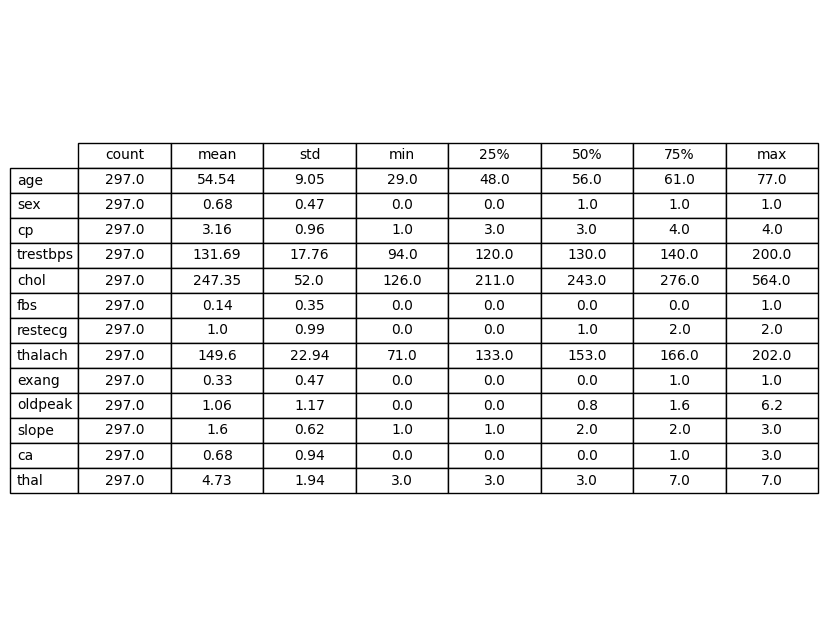

In [9]:
# Descriptive statistics for features
descriptive_stats = X.describe(include='all')
print("\nDescriptive Statistics:")
print(descriptive_stats)
#Round the numbers
descriptive_stats = descriptive_stats.round(2)
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))  # Increased figure size

# Create a table for descriptive statistics
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.axis('tight')
plt.axis('off')
table_data = descriptive_stats.T  # Transpose for better display
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  rowLabels=table_data.index,
                  cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Increased scale for better visibility

# Correlation Matrix


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.1

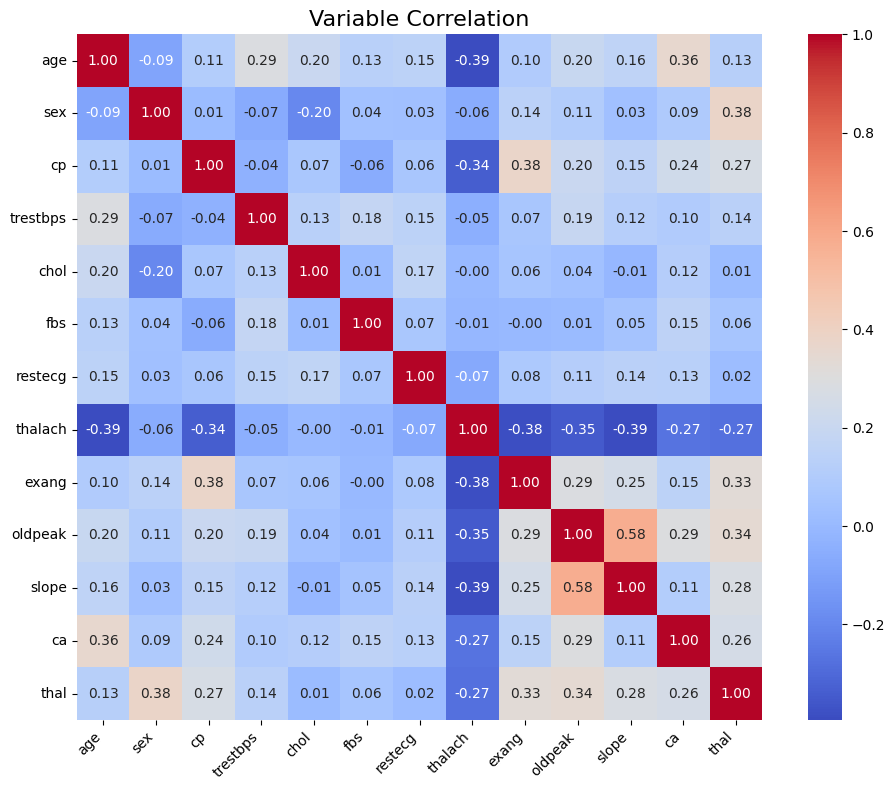

In [10]:
# Correlation matrix for features
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Title and labels
plt.title('Variable Correlation', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.yticks(rotation=0)  # Keep y labels horizontal

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Checking for duplicates
duplicated_rows = X[X.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


# Tentative Methodology

In [12]:
# Tentative methology flowchart
!pip install graphviz
from graphviz import Digraph
from graphviz import Digraph

# Create a new directed graph
flowchart = Digraph()

# Define the nodes with colors
flowchart.node('A', 'Data Collection: Heart Disease Dataset', style='filled', fillcolor='lightblue')
flowchart.node('B', 'Data Preprocessing', style='filled', fillcolor='lightblue')
flowchart.node('C', 'Significant Feature Selection', style='filled', fillcolor='lightblue')
flowchart.node('D', 'Model Selection: Training and Testing Sets', style='filled', fillcolor='lightblue')
flowchart.node('E', 'Model Training', style='filled', fillcolor='lightblue')
flowchart.node('F', 'Model Evaluation', style='filled', fillcolor='lightblue')
flowchart.node('G', 'Model Interpretation', style='filled', fillcolor='lightblue')
flowchart.node('H', 'Deployment:Key Findings', style='filled', fillcolor='lightblue')

# Define the edges (connections between nodes)
flowchart.edge('A', 'B')
flowchart.edge('B', 'C')
flowchart.edge('C', 'D')
flowchart.edge('D', 'E')
flowchart.edge('E', 'F')
flowchart.edge('F', 'G')
flowchart.edge('G', 'H')

# Render the flowchart to a file (e.g., PNG)
flowchart.render('colored_flowchart', format='png', cleanup=True)

'colored_flowchart.png'

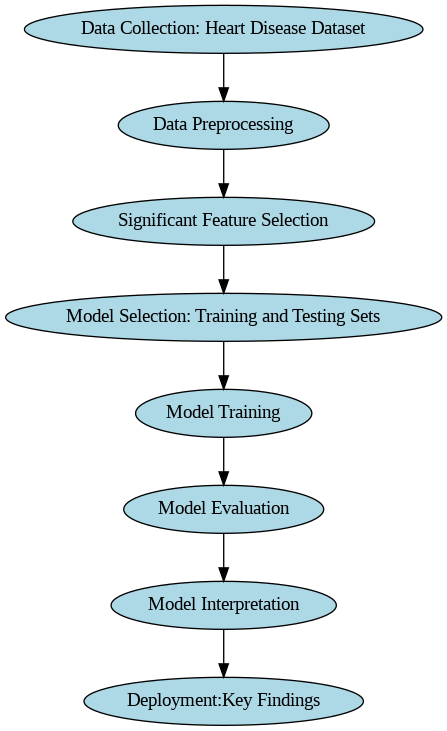

In [13]:
from IPython.display import Image

# Display the flowchart
Image('colored_flowchart.png')

# Machine Learning Modelling

**Feature Selection**

In [14]:
# Convert categorical variables to numeric
X_encoded = pd.get_dummies(X, drop_first=True)

# Filter y to match X_encoded's index
y = y.loc[X_encoded.index]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

#Select top features using ANOVA F-test, apply SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # Adjust 'k' as needed
X_selected = selector.fit_transform(X_scaled, y)

# Get feature scores
feature_scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to summarize results
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F-score': feature_scores,
    'p-value': p_values
})

# Sort features by F-score
feature_importance = feature_importance.sort_values(by='F-score', ascending=False)

# Display the top features
print("Top Features based on ANOVA F-test:")
print(feature_importance.head(5))  # Display top 5 features

# Get the selected feature scores
feature_scores = selector.scores_
print("Feature scores:", feature_scores)

Top Features based on ANOVA F-test:
    Feature    F-score       p-value
12     thal  31.268401  1.111616e-21
11       ca  28.112912  9.170488e-20
9   oldpeak  25.425463  4.358397e-18
7   thalach  19.539409  2.912311e-14
8     exang  17.750409  4.676316e-13
Feature scores: [ 4.90341269  6.19686253 16.87595401  2.04750108  0.87141245  2.00155566
  3.38457248 19.53940947 17.75040874 25.42546322 12.30144634 28.11291206
 31.26840112]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In this section I will compare different classification models.
I will split the dataset into training (80%) and testing (20%) subsets

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Recode target "y" to binary format (0 = no heart disease, 1 = heart disease)
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int) # Also recode y_test

# Initialize models
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

# Train models
logistic_model.fit(X_train, y_train) # Train Logistic Regression
tree_model.fit(X_train, y_train) # Train Decision Tree
forest_model.fit(X_train, y_train)  # Train Random Forest
svm_model.fit(X_train, y_train)  # Train SVM
knn_model.fit(X_train, y_train)  # Train KNN
naive_bayes_model.fit(X_train, y_train)  # Train Naive Bayes


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

GaussianNB()

# **Model Evaluation**

**Accuracy**

In [19]:
#print the accuracy on the test set for each model to compare performance
print("Logistic Regression Test Accuracy: {:.2f}%".format(logistic_model.score(X_test, y_test) * 100))
print("Decision Tree Test Accuracy: {:.2f}%".format(tree_model.score(X_test, y_test) * 100))
print("Random Forest Test Accuracy: {:.2f}%".format(forest_model.score(X_test, y_test) * 100))
print("SVM Test Accuracy: {:.2f}%".format(svm_model.score(X_test, y_test) * 100))
print("KNN Test Accuracy: {:.2f}%".format(knn_model.score(X_test, y_test) * 100))
print("Naive Bayes Test Accuracy: {:.2f}%".format(naive_bayes_model.score(X_test, y_test) * 100))

Logistic Regression Test Accuracy: 86.67%
Decision Tree Test Accuracy: 81.67%
Random Forest Test Accuracy: 88.33%
SVM Test Accuracy: 88.33%
KNN Test Accuracy: 83.33%
Naive Bayes Test Accuracy: 91.67%


**Results Visualization**

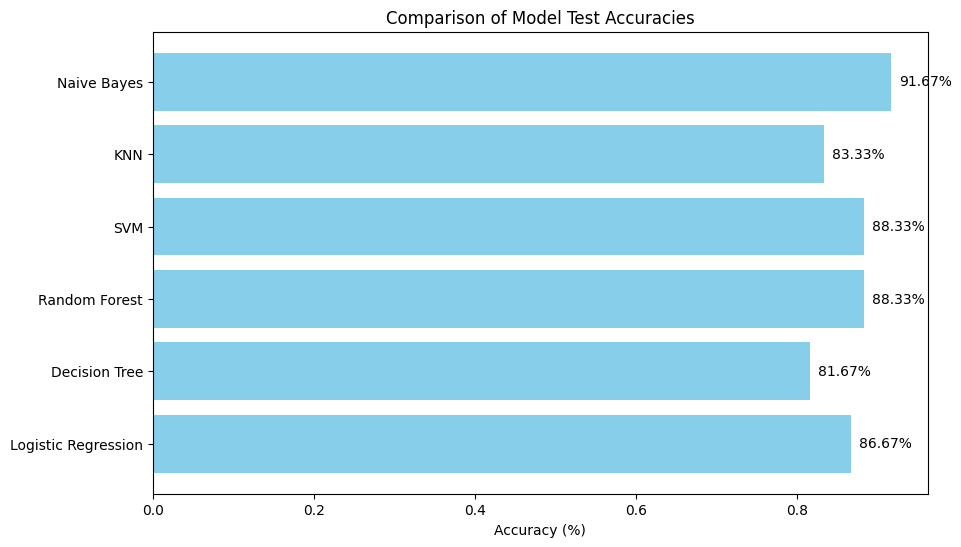

In [20]:
# Create a list of model names and corresponding test accuracies
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "Naive Bayes"]
accuracies = [
    logistic_model.score(X_test, y_test),
    tree_model.score(X_test, y_test),
    forest_model.score(X_test, y_test),
    svm_model.score(X_test, y_test),
    knn_model.score(X_test, y_test),
    naive_bayes_model.score(X_test, y_test)
]

# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart
ax.barh(model_names, accuracies, color='skyblue')

# Add titles and labels
ax.set_xlabel('Accuracy (%)')
ax.set_title('Comparison of Model Test Accuracies')

# Display the accuracy values on the bars
for i in range(len(accuracies)):
    ax.text(accuracies[i] + 0.01, i, f'{accuracies[i] * 100:.2f}%', va='center')

# Show the plot
plt.show()

**Precision, Recall and F1-scores**

In [21]:
# List of models to evaluate
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": naive_bayes_model
}
# Iterate over models and compute Precision, Recall, F1-score
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")

    # Get predictions for the test set
    y_pred = model.predict(X_test)

    # Compute Precision, Recall, and F1-Score
    # Changed 'binary' to 'weighted' for multiclass classification
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')

    # Print Precision, Recall, F1-Score
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Optionally, print classification report (includes Precision, Recall, F1-Score)
    print("\nClassification Report:")

    # Get unique class labels from y_test, this will get the actual class labels
    # present in your data
    unique_labels = sorted(list(set(y_test['num'])))

    # Dynamically creating target_names based on the unique labels in y_test
    target_names = [f"Class {label}" for label in unique_labels]

    # Now print the classification report using the generated target_names
    print(classification_report(y_test['num'], y_pred, target_names=target_names))


Evaluating Logistic Regression...

Precision: 0.8667
Recall: 0.8667
F1-Score: 0.8667

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.89      0.89        36
     Class 1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60


Evaluating Decision Tree...

Precision: 0.8316
Recall: 0.8167
F1-Score: 0.8185

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.78      0.84        36
     Class 1       0.72      0.88      0.79        24

    accuracy                           0.82        60
   macro avg       0.81      0.83      0.81        60
weighted avg       0.83      0.82      0.82        60


Evaluating Random Forest...

Precision: 0.8846
Recall: 0.8833
F1-Score: 0.8837

Classification Report:
              precision    r

**Visualization**

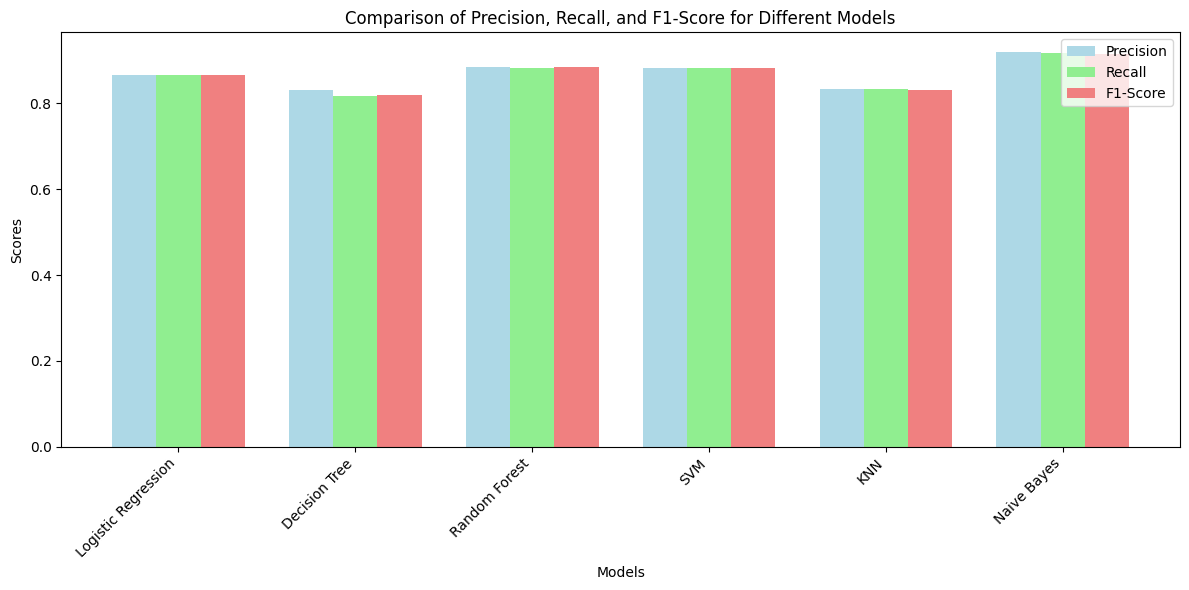

In [22]:
# Store the metrics
precision_scores = []
recall_scores = []
f1_scores = []
model_names = []

# Calculate Precision, Recall, and F1 for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Changed 'binary' to 'weighted' for multiclass classification
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    model_names.append(model_name)

# Plotting the bar charts for Precision, Recall, and F1-Score
x = np.arange(len(models))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for Precision, Recall, and F1-Score
ax.bar(x - width, precision_scores, width, label='Precision', color='lightblue')
ax.bar(x, recall_scores, width, label='Recall', color='lightgreen')
ax.bar(x + width, f1_scores, width, label='F1-Score', color='lightcoral')

# Add labels, title, and custom x-ticks
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)

# Add a legend
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Cross Validation Evaluation**

In [23]:
# List of models to evaluate
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": naive_bayes_model
}

# Cross-validation (k-fold)
cv = 10  # You can change the number of folds (e.g., 5, 10)

# Iterate over models and compute Cross-Validation results
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} using {cv}-fold cross-validation...\n")

    # Cross-validation score (accuracy)
    cv_scores = cross_val_score(model, X_selected, y, cv=cv)
    print(f"Cross-validated Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
# List of models to evaluate
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": naive_bayes_model
}

# Cross-validation (k-fold)
cv = 10  # You can change the number of folds (e.g., 5, 10)

# Iterate over models and compute Cross-Validation results
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} using {cv}-fold cross-validation...\n")

    # Cross-validation score (accuracy)
    cv_scores = cross_val_score(model, X_selected, y, cv=cv)
    print(f"Cross-validated Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Cross-validation predictions (for Precision, Recall, F1-score)
    y_pred_cv = cross_val_predict(model, X_selected, y, cv=cv)

    # Classification report
    print(classification_report(y, y_pred_cv))


Evaluating Logistic Regression using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.86666667 0.86666667 0.76666667 0.96666667 0.8        0.76666667
 0.76666667 0.89655172 0.72413793 0.86206897]
Mean Cross-validated Accuracy: 0.8283 ± 0.0714

Evaluating Decision Tree using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.76666667 0.8        0.8        0.86666667 0.7        0.66666667
 0.66666667 0.79310345 0.75862069 0.72413793]
Mean Cross-validated Accuracy: 0.7543 ± 0.0614

Evaluating Random Forest using 10-fold cross-validation...



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated Accuracy Scores: [0.9        0.83333333 0.86666667 0.93333333 0.86666667 0.76666667
 0.7        0.86206897 0.75862069 0.86206897]
Mean Cross-validated Accuracy: 0.8349 ± 0.0679

Evaluating SVM using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.86666667 0.86666667 0.8        0.96666667 0.8        0.8
 0.76666667 0.82758621 0.75862069 0.82758621]
Mean Cross-validated Accuracy: 0.8280 ± 0.0576

Evaluating KNN using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.9        0.86666667 0.9        0.9        0.83333333 0.83333333
 0.8        0.82758621 0.72413793 0.79310345]
Mean Cross-validated Accuracy: 0.8378 ± 0.0538

Evaluating Naive Bayes using 10-fold cross-validation...



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated Accuracy Scores: [0.83333333 0.83333333 0.93333333 0.93333333 0.76666667 0.8
 0.83333333 0.89655172 0.75862069 0.86206897]
Mean Cross-validated Accuracy: 0.8451 ± 0.0588

Evaluating Logistic Regression using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.86666667 0.86666667 0.76666667 0.96666667 0.8        0.76666667
 0.76666667 0.89655172 0.72413793 0.86206897]
Mean Cross-validated Accuracy: 0.8283 ± 0.0714
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       160
           1       0.83      0.79      0.81       137

    accuracy                           0.83       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.83      0.83      0.83       297


Evaluating Decision Tree using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.73333333 0.8        0.76666667 0.83333333 0.7        0.7
 0.73333333 0.79310345 0.72413793 0.72413793]
Mean Cross-validated Accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated Accuracy Scores: [0.9        0.83333333 0.9        0.9        0.86666667 0.66666667
 0.7        0.89655172 0.75862069 0.86206897]
Mean Cross-validated Accuracy: 0.8284 ± 0.0838


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       160
           1       0.85      0.78      0.81       137

    accuracy                           0.84       297
   macro avg       0.84      0.83      0.83       297
weighted avg       0.84      0.84      0.83       297


Evaluating SVM using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.86666667 0.86666667 0.8        0.96666667 0.8        0.8
 0.76666667 0.82758621 0.75862069 0.82758621]
Mean Cross-validated Accuracy: 0.8280 ± 0.0576
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       160
           1       0.83      0.80      0.81       137

    accuracy                           0.83       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.83      0.83      0.83       297


Evaluating KNN using 10-fold cross-validation...



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validated Accuracy Scores: [0.9        0.86666667 0.9        0.9        0.83333333 0.83333333
 0.8        0.82758621 0.72413793 0.79310345]
Mean Cross-validated Accuracy: 0.8378 ± 0.0538
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       160
           1       0.84      0.80      0.82       137

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.84       297
weighted avg       0.84      0.84      0.84       297


Evaluating Naive Bayes using 10-fold cross-validation...

Cross-validated Accuracy Scores: [0.83333333 0.83333333 0.93333333 0.93333333 0.76666667 0.8
 0.83333333 0.89655172 0.75862069 0.86206897]
Mean Cross-validated Accuracy: 0.8451 ± 0.0588
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       160
           1       0.85      0.81      0.83       137

    accuracy                           0.85       297
   macro avg     

**Model Performance**

In [29]:
# Save the mean scores for each model
logistic_cv_scores = cross_val_score(logistic_model, X_selected, y, cv=10)
tree_cv_scores = cross_val_score(tree_model, X_selected, y, cv=10)
forest_cv_scores = cross_val_score(forest_model, X_selected, y, cv=10)
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X_selected, y, cv=10)
svm_cv_scores = cross_val_score(svm_model, X_selected, y, cv=10)
knn_cv_scores = cross_val_score(knn_model, X_selected, y, cv=10)

#Print the mean and standard deviation of the CV scores
print("\nMean and Std Dev of CV scores:")
print("Logistic Regression mean score: {:.4f}, Std Dev: {:.4f}".format(logistic_cv_scores.mean(), logistic_cv_scores.std()))
print("Decision Tree mean score: {:.4f}, Std Dev: {:.4f}".format(tree_cv_scores.mean(), tree_cv_scores.std()))
print("Random Forest mean score: {:.4f}, Std Dev: {:.4f}".format(forest_cv_scores.mean(), forest_cv_scores.std()))
print("Naive Bayes mean score: {:.4f}, Std Dev: {:.4f}".format(naive_bayes_cv_scores.mean(), naive_bayes_cv_scores.std()))
print("SVM mean score: {:.4f}, Std Dev: {:.4f}".format(svm_cv_scores.mean(), svm_cv_scores.std()))
print("KNN mean score: {:.4f}, Std Dev: {:.4f}".format(knn_cv_scores.mean(), knn_cv_scores.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Mean and Std Dev of CV scores:
Logistic Regression mean score: 0.8283, Std Dev: 0.0714
Decision Tree mean score: 0.7440, Std Dev: 0.0567
Random Forest mean score: 0.8247, Std Dev: 0.0793
Naive Bayes mean score: 0.8451, Std Dev: 0.0588
SVM mean score: 0.8280, Std Dev: 0.0576
KNN mean score: 0.8378, Std Dev: 0.0538


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

**Visualization**

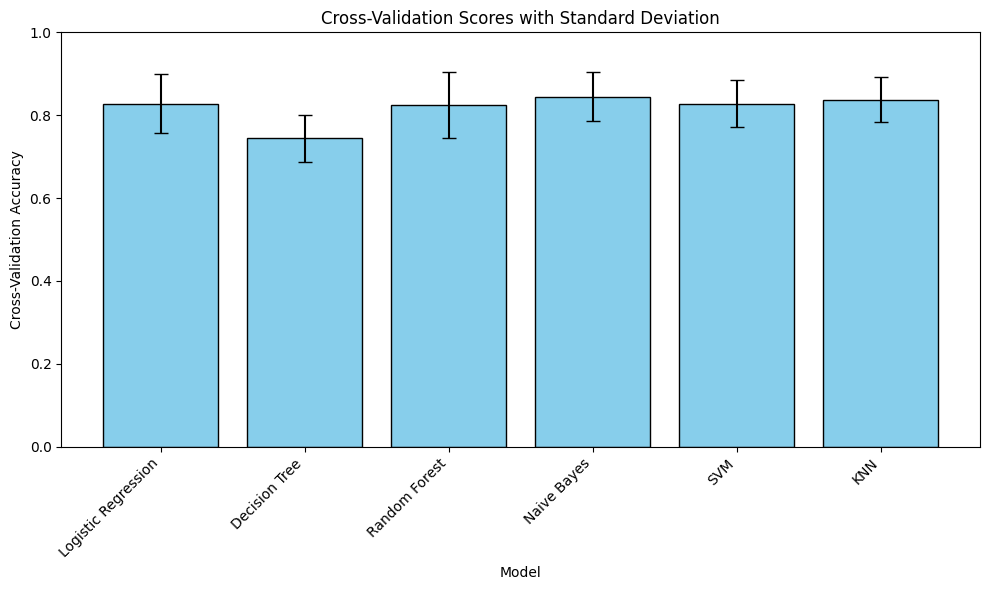

In [30]:
# Define the models and their respective cross-validation scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM', 'KNN']
mean_scores = [
    logistic_cv_scores.mean(),
    tree_cv_scores.mean(),
    forest_cv_scores.mean(),
    naive_bayes_cv_scores.mean(),
    svm_cv_scores.mean(),
    knn_cv_scores.mean()
]
std_devs = [
    logistic_cv_scores.std(),
    tree_cv_scores.std(),
    forest_cv_scores.std(),
    naive_bayes_cv_scores.std(),
    svm_cv_scores.std(),
    knn_cv_scores.std()
]

# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, yerr=std_devs, capsize=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Scores with Standard Deviation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis to range from 0 to 1 (for accuracy)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Interpretation

Naive Bayes classification model was the best performer out of the six methods.

**Observations**:

**Overall Performance**
Accuracy: 0.85
The model's overall accuracy is 85%, meaning it correctly predicts the presence or absence of heart disease 85% of the time across all instances.

**Macro Average:**
Precision: 0.85, Recall: 0.84, F1-score: 0.84
The macro average treats both classes equally, giving us an overall view of the model's performance across both classes. The high macro average precision, recall, and F1-score indicate the model is doing a good job at predicting both classes.

**Weighted Average**
Precision: 0.85, Recall: 0.85, F1-score: 0.84
The weighted average accounts for the imbalanced dataset (more instances of class 0 than class 1). Since the number of instances in each class is weighted, the weighted averages are very similar to the macro averages, which is a good sign. It suggests the model is not heavily biased toward the larger class (class 0) and is performing fairly well for both classes.

# Suggestions for Improvement
Improving Recall for Class 1: The model could potentially be improved in detecting heart disease cases by exploring techniques like oversampling (e.g., SMOTE), to make it more sensitive to class 1.
In addition hyperparameter tuning such as treshold adjustment could also further improve performance.

In [34]:
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Naive Bayes model on the resampled dataset
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_resampled, y_resampled)

# Get predicted probabilities for class 1
y_prob = naive_bayes_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Adjust the decision threshold (e.g., to 0.3)
# It Makes the model more sensitive to heart disease cases,higher recall, but potentially decreases precision.
threshold = 0.3
y_pred_adjusted = (y_prob > threshold).astype(int)

# Print classification report to see recall for class 1
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.88      0.92      0.90        24

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Improved Results


The precision and recall for both classes are now more balanced, and the recall for class 1 (heart disease) has improved significantly to 92%. This suggests that the adjustments (SMOTE and threshold tuning) helped the model become much better at detecting heart disease cases without sacrificing too much precision. Our applied strategies were effective in improving the model's ability to detect heart disease cases while maintaining a good performance on the "no heart disease" class.


# Key Takeaways

Based on the analysis and model evaluation, Naive Bayes emerged as the best-performing machine learning model for predicting heart disease. It demonstrated strong performance with a weighted average precision of 92%, indicating its ability to accurately identify heart disease cases across different classes. Feature selection using the ANOVA F-test revealed the five most important predictors of heart disease, which were: Thalassemia, the number of major vessels colored by fluoroscopy (ca), ST depression induced by exercise (oldpeak), maximum heart rate achieved (thalach), and the presence of exercise-induced angina (exang). These features were found to have the highest statistical significance in distinguishing between individuals with and without heart disease. This analysis highlights the effectiveness of both Naive Bayes and the selected features in providing meaningful insights for heart disease prediction.